# Linear Model Predictive Control with perfect state Knowledge.
In this notebook I follow the online tutorial on Model Predictive by Aleksander Haber

https://aleksandarhaber.com/model-predictive-control-mpc-tutorial-1-unconstrained-formulation-derivation-and-implementation-in-python-from-scratch/

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Define Model
Simple Spring Damper System with two masses

In [42]:
k1 = 100
k2 = 100
d1 = 0.1
d2 = 0.1
m1 = 1.0
m2 = 1.0

# System Evolution Matrix
A_c = np.array(
    [
        [0, 1, 0, 0],
        [- (k1 + k2) / m1, - (d1 + d2) / m1, k2 / m1, d2 / m1],
        [0, 0, 0, 1],
        [k2/m2, d2/m2, -k2/m2, -d2/m2],
    ]
)

# Input Matrix
B_c = np.array([
    [0],
    [0],
    [0],
    [1/m2]
])


# Output Matrix
C = np.array(
    [1, 0, 0, 0]
)

# Discretization
dt = 0.01
A = np.linalg.inv(np.eye(4) - dt * A_c)
B = dt *  A @ B_c

In [43]:
B.shape

(4, 1)

In [49]:
# Simulate the system
t = np.linspace(0, 10, 1000)
dt = t[1] - t[0]
x = np.zeros((4, len(t)))
x[:, 0] = np.array([0.1, 0.1, 0.1, 0.1])
u = np.zeros((1, len(t)))

for i in range(len(t) - 1):
    x[:, i + 1] = A @ x[:, i] + B @ u[:, i]
    

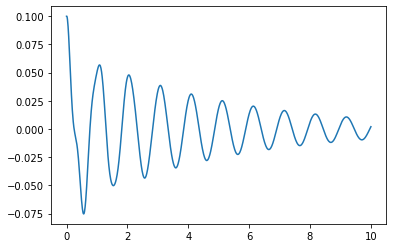

In [50]:
plt.plot(t, x[0, :])

In [1]:
class MPC:
    def __init__(A, B, C, f, v, W3, W4,x0) -> None:
        self.A = A
        self.B = B
        self.C = C
        self.f = f
        self.v = v
        self.W3 = W3
        self.W4 = W4
        self.x0 = x0

        self.n = self.A.shape[0]
        self.r = self.C.shape[0]
        self.m = self.B.shape[1]

        self.states = [x0]
        self.inputs = []
        self.outputs = [self.C @ x0]

        self.O, self.M, self.gainMatrix = self.compute_lifted_system()

    def compute_lifted_system(self):
        pass

        

SyntaxError: expected ':' (1147784700.py, line 1)